In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/sample_data/Car_Price_Prediction.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df.shape

(205, 26)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
ai = ['car_ID','symboling','boreratio','compressionratio','stroke']

In [7]:
df.drop(ai,axis=1,inplace=True)

In [8]:
df

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2548,dohc,four,130,mpfi,111,5000,21,27,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2548,dohc,four,130,mpfi,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,2823,ohcv,six,152,mpfi,154,5000,19,26,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,2337,ohc,four,109,mpfi,102,5500,24,30,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,2824,ohc,five,136,mpfi,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,2952,ohc,four,141,mpfi,114,5400,23,28,16845.0
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,3049,ohc,four,141,mpfi,160,5300,19,25,19045.0
202,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3012,ohcv,six,173,mpfi,134,5500,18,23,21485.0
203,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,3217,ohc,six,145,idi,106,4800,26,27,22470.0


In [9]:
df.dtypes

,0
CarName,object
fueltype,object
aspiration,object
doornumber,object
carbody,object
drivewheel,object
enginelocation,object
wheelbase,float64
carlength,float64
carwidth,float64


In [10]:
df['Car_Company'] = df["CarName"].str.split(" ").str[0]
df["Model"] = df["CarName"].str.split(" ").str[1]

In [11]:
df

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,horsepower,peakrpm,citympg,highwaympg,price,Car_Company,Model
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,111,5000,21,27,13495.0,alfa-romero,giulia
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,111,5000,21,27,16500.0,alfa-romero,stelvio
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,six,152,mpfi,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,four,109,mpfi,102,5500,24,30,13950.0,audi,100
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,five,136,mpfi,115,5500,18,22,17450.0,audi,100ls
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,four,141,mpfi,114,5400,23,28,16845.0,volvo,145e
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,four,141,mpfi,160,5300,19,25,19045.0,volvo,144ea
202,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,six,173,mpfi,134,5500,18,23,21485.0,volvo,244dl
203,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,six,145,idi,106,4800,26,27,22470.0,volvo,246


In [12]:
df.drop("CarName",axis=1,inplace=True)

In [13]:
column = list(df.columns)

In [14]:
column

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price',
 'Car_Company',
 'Model']

In [15]:
column.remove('Car_Company')

In [16]:
column.insert(0,"Car_Company")

In [17]:
column.remove("Model")
column.insert(1,"Model")

In [18]:
column

['Car_Company',
 'Model',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [19]:
df = df[column]

In [20]:
df

,Car_Company,Model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,2548,dohc,four,130,mpfi,111,5000,21,27,13495.0
1,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,2548,dohc,four,130,mpfi,111,5000,21,27,16500.0
2,alfa-romero,Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2823,ohcv,six,152,mpfi,154,5000,19,26,16500.0
3,audi,100,gas,std,four,sedan,fwd,front,99.8,176.6,...,2337,ohc,four,109,mpfi,102,5500,24,30,13950.0
4,audi,100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,2824,ohc,five,136,mpfi,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,145e,gas,std,four,sedan,rwd,front,109.1,188.8,...,2952,ohc,four,141,mpfi,114,5400,23,28,16845.0
201,volvo,144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,3049,ohc,four,141,mpfi,160,5300,19,25,19045.0
202,volvo,244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,3012,ohcv,six,173,mpfi,134,5500,18,23,21485.0
203,volvo,246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,3217,ohc,six,145,idi,106,4800,26,27,22470.0


In [21]:
#  Exploratory Data Analysis

In [22]:
df["Car_Company"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [23]:
def replace_values(old,new):
  df["Car_Company"] = df["Car_Company"].str.replace(old,new)

In [24]:
replace_values("maxda","mazda")
replace_values("nissan","Nissan")
replace_values("porcshce","porsche")
replace_values("vokswagen","volkswagen")
replace_values("toyouta","toyota")

In [25]:
# df["Car_Company"] = df["Car_Company"].str.replace("maxda","mazda")

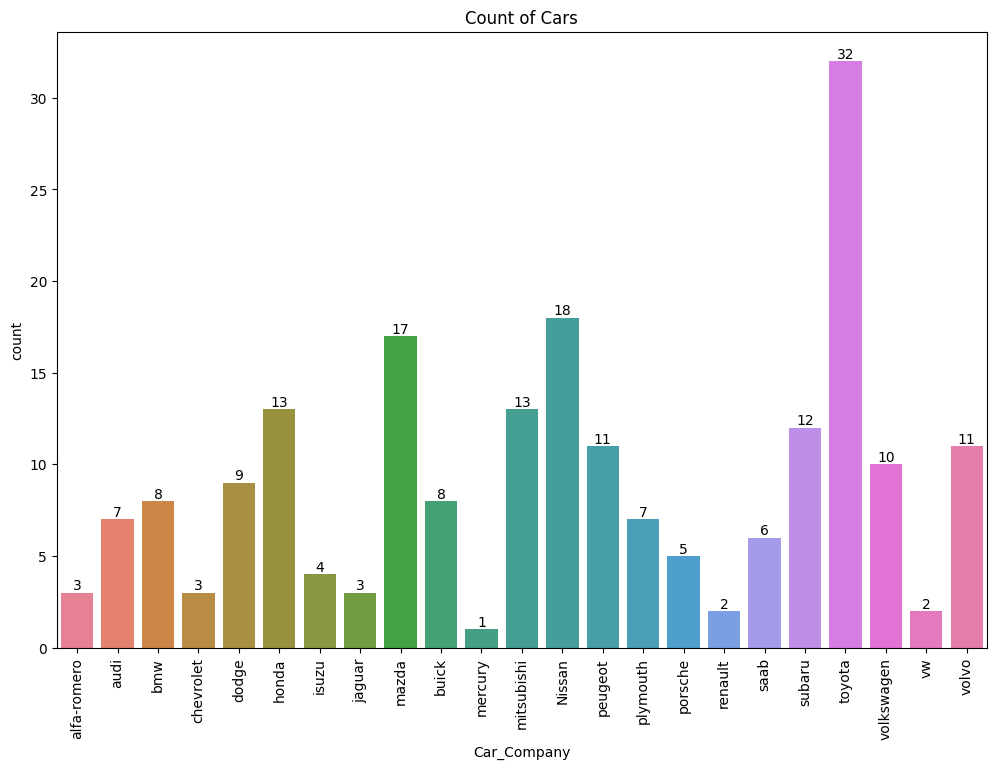

In [26]:
plt.figure(figsize = (12,8))
ki = sns.countplot(x='Car_Company',data=df,hue='Car_Company')
for i in ki.containers:
  plt.bar_label(i)
plt.title('Count of Cars')
plt.xticks(rotation=90)
plt.show()

In [27]:
 ai = df['Model'].value_counts().head(10)

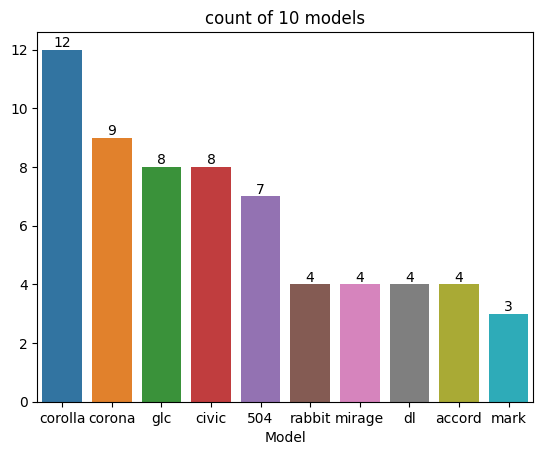

In [28]:
ki = sns.barplot(x= ai.index,y=ai.values,hue=ai.index)
for i in ki.containers:
  plt.bar_label(i)
plt.title('count of 10 models')
plt.show()


In [29]:
si =df['fueltype'].value_counts()

In [30]:
si

,count
fueltype,
gas,185
diesel,20


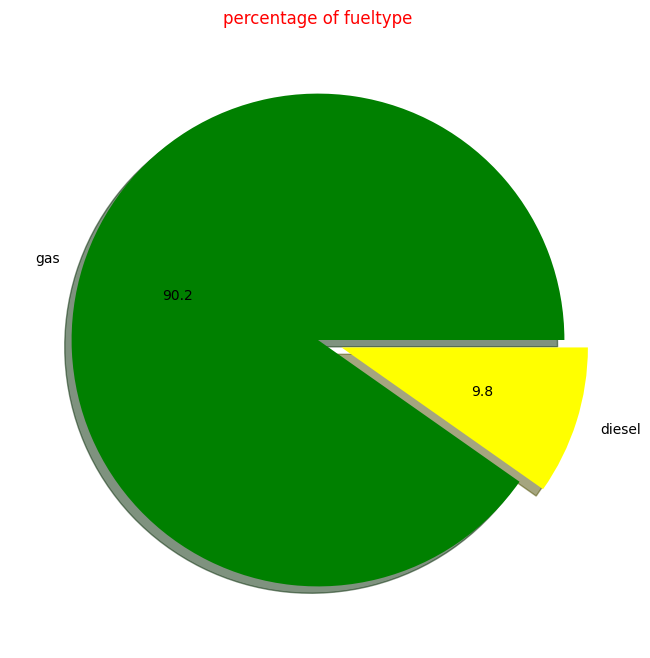

In [31]:
plt.figure(figsize=(12,8))
plt.pie(si.values,labels=si.index,autopct='%.1f',shadow=True,explode=[0,0.1],colors=["green","yellow"])
plt.title('percentage of fueltype',color='red')
plt.show()

In [32]:
## Average carlenght by carcompany:

In [33]:
average_carlenght_carcomapny = df.groupby('Car_Company')['carlength'].mean().reset_index()
average_carlenght_carcomapny["carlength"] = average_carlenght_carcomapny["carlength"].round(2)


In [34]:
average_carlenght_carcomapny

,Car_Company,carlength
0,Nissan,170.99
1,alfa-romero,169.60
2,audi,183.83
3,bmw,184.50
4,buick,195.26
5,chevrolet,151.93
6,dodge,160.99
7,honda,160.77
8,isuzu,163.78
9,jaguar,196.97


<ipython-input-35-3217cf13c676>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ni= sns.barplot(x = 'Car_Company',y='carlength',data=average_carlenght_carcomapny,palette="crest")


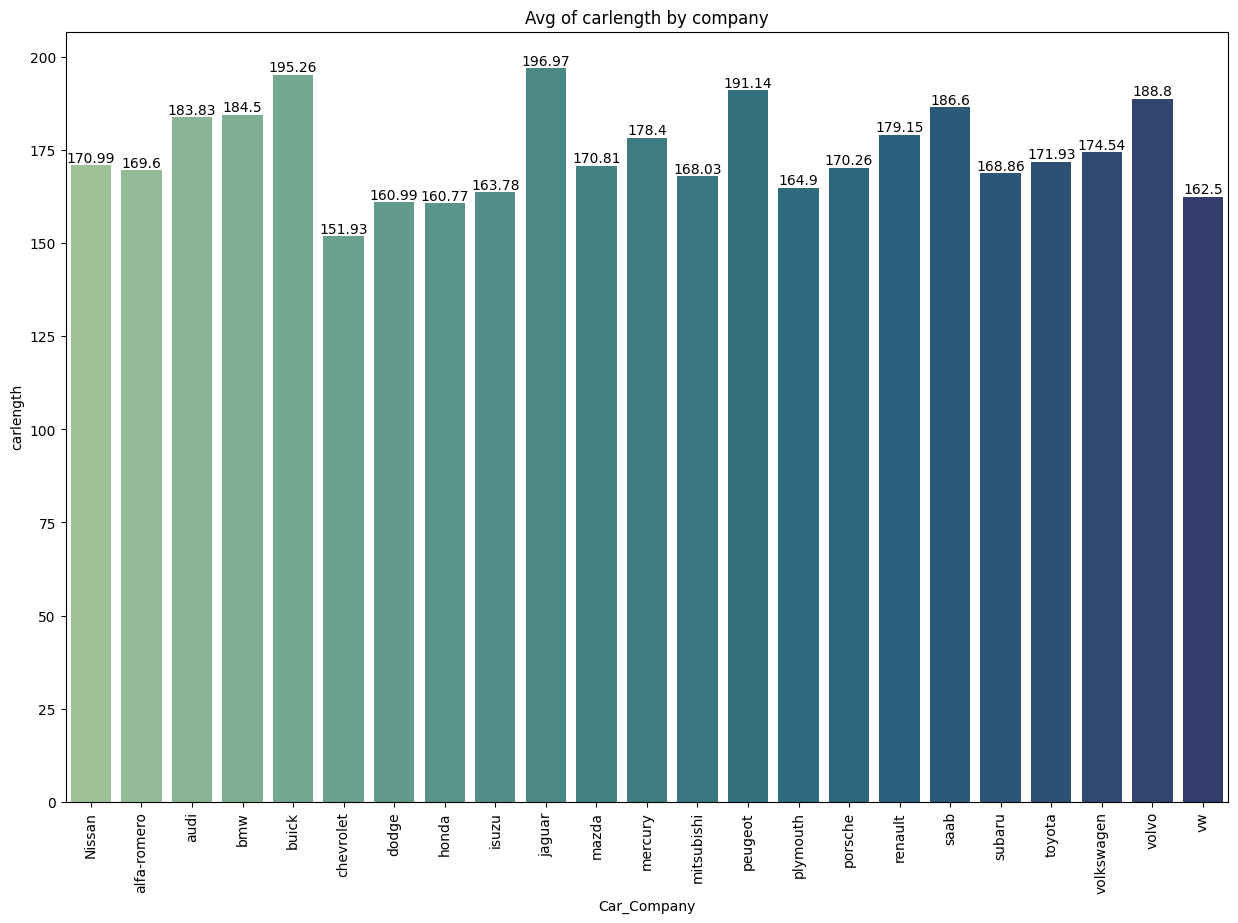

In [35]:
plt.figure(figsize=(15,10))
ni= sns.barplot(x = 'Car_Company',y='carlength',data=average_carlenght_carcomapny,palette="crest")
plt.xticks(rotation=90)
for i in ni.containers:
  plt.bar_label(i)
plt.title('Avg of carlength by company')
plt.show()

In [36]:
df['carbody'].value_counts()

,count
carbody,
sedan,96
hatchback,70
wagon,25
hardtop,8
convertible,6


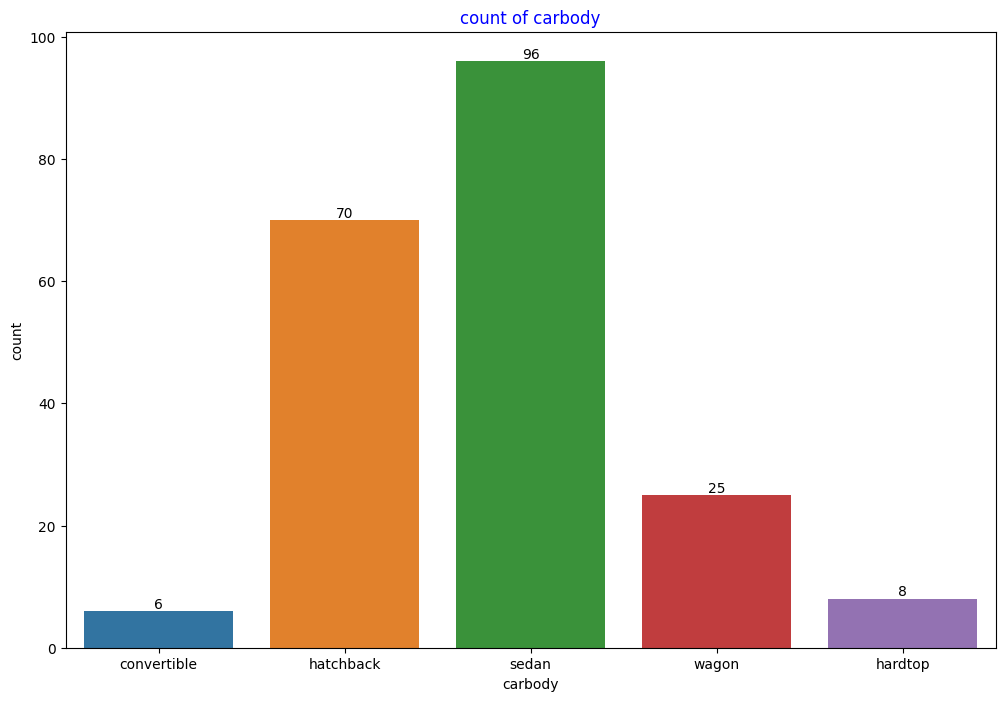

In [37]:
plt.figure(figsize=(12,8))
o= sns.countplot(x='carbody',data=df,hue='carbody')
for i in o.containers:
  plt.bar_label(i)
plt.title('count of carbody',color='blue')
plt.show()

In [38]:
### the most car body in the dataset is of sedan bodytype and count of that body type is 96..

In [39]:
df

,Car_Company,Model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,2548,dohc,four,130,mpfi,111,5000,21,27,13495.0
1,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,2548,dohc,four,130,mpfi,111,5000,21,27,16500.0
2,alfa-romero,Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2823,ohcv,six,152,mpfi,154,5000,19,26,16500.0
3,audi,100,gas,std,four,sedan,fwd,front,99.8,176.6,...,2337,ohc,four,109,mpfi,102,5500,24,30,13950.0
4,audi,100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,2824,ohc,five,136,mpfi,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,145e,gas,std,four,sedan,rwd,front,109.1,188.8,...,2952,ohc,four,141,mpfi,114,5400,23,28,16845.0
201,volvo,144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,3049,ohc,four,141,mpfi,160,5300,19,25,19045.0
202,volvo,244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,3012,ohcv,six,173,mpfi,134,5500,18,23,21485.0
203,volvo,246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,3217,ohc,six,145,idi,106,4800,26,27,22470.0


In [40]:
df['enginetype'].value_counts()

,count
enginetype,
ohc,148
ohcf,15
ohcv,13
dohc,12
l,12
rotor,4
dohcv,1


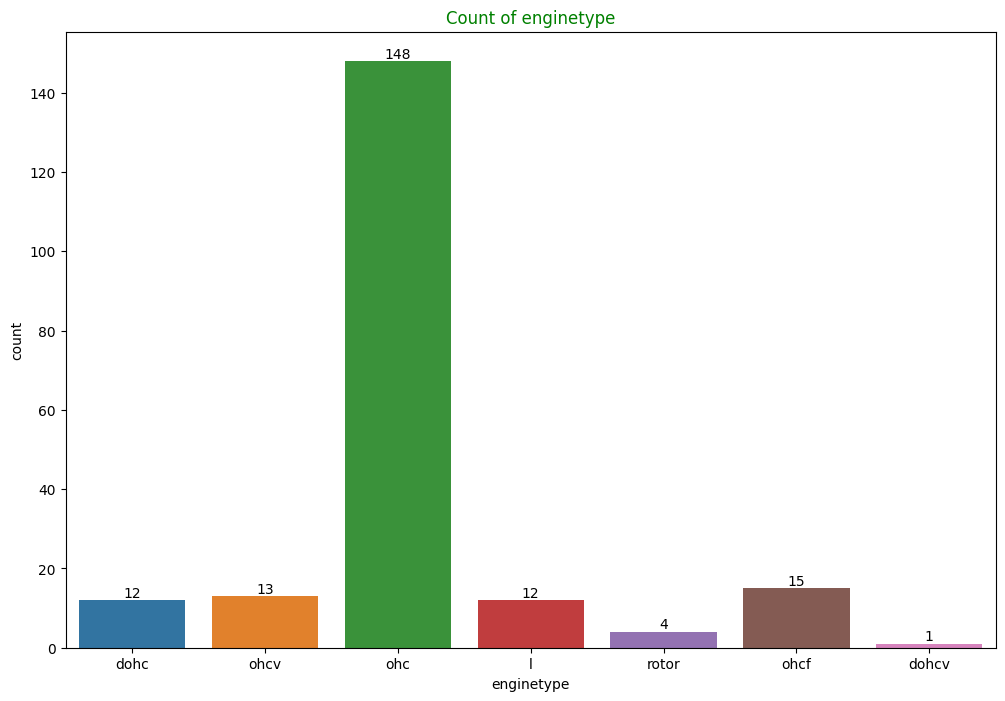

In [41]:
plt.figure(figsize=(12,8))
ti=sns.countplot(x='enginetype',data=df,hue='enginetype')
for i in ti.containers:
  plt.bar_label(i)
plt.title('Count of enginetype',color='Green')
plt.show()


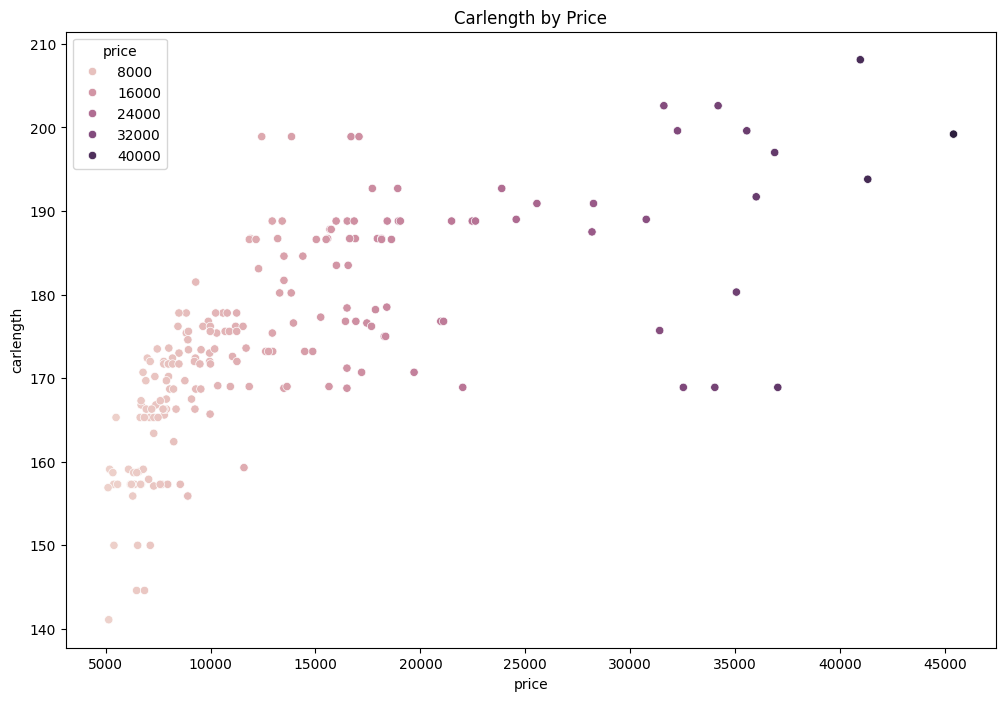

In [42]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='carlength',data=df,hue='price')
plt.title('Carlength by Price')
plt.show()

In [43]:
average_price_company = df.groupby('Car_Company')['price'].mean().reset_index()
average_price_company['price'] = average_price_company['price'].round(2)

In [44]:
average_price_company

,Car_Company,price
0,Nissan,10415.67
1,alfa-romero,15498.33
2,audi,17859.17
3,bmw,26118.75
4,buick,33647.00
5,chevrolet,6007.00
6,dodge,7875.44
7,honda,8184.69
8,isuzu,8916.50
9,jaguar,34600.00


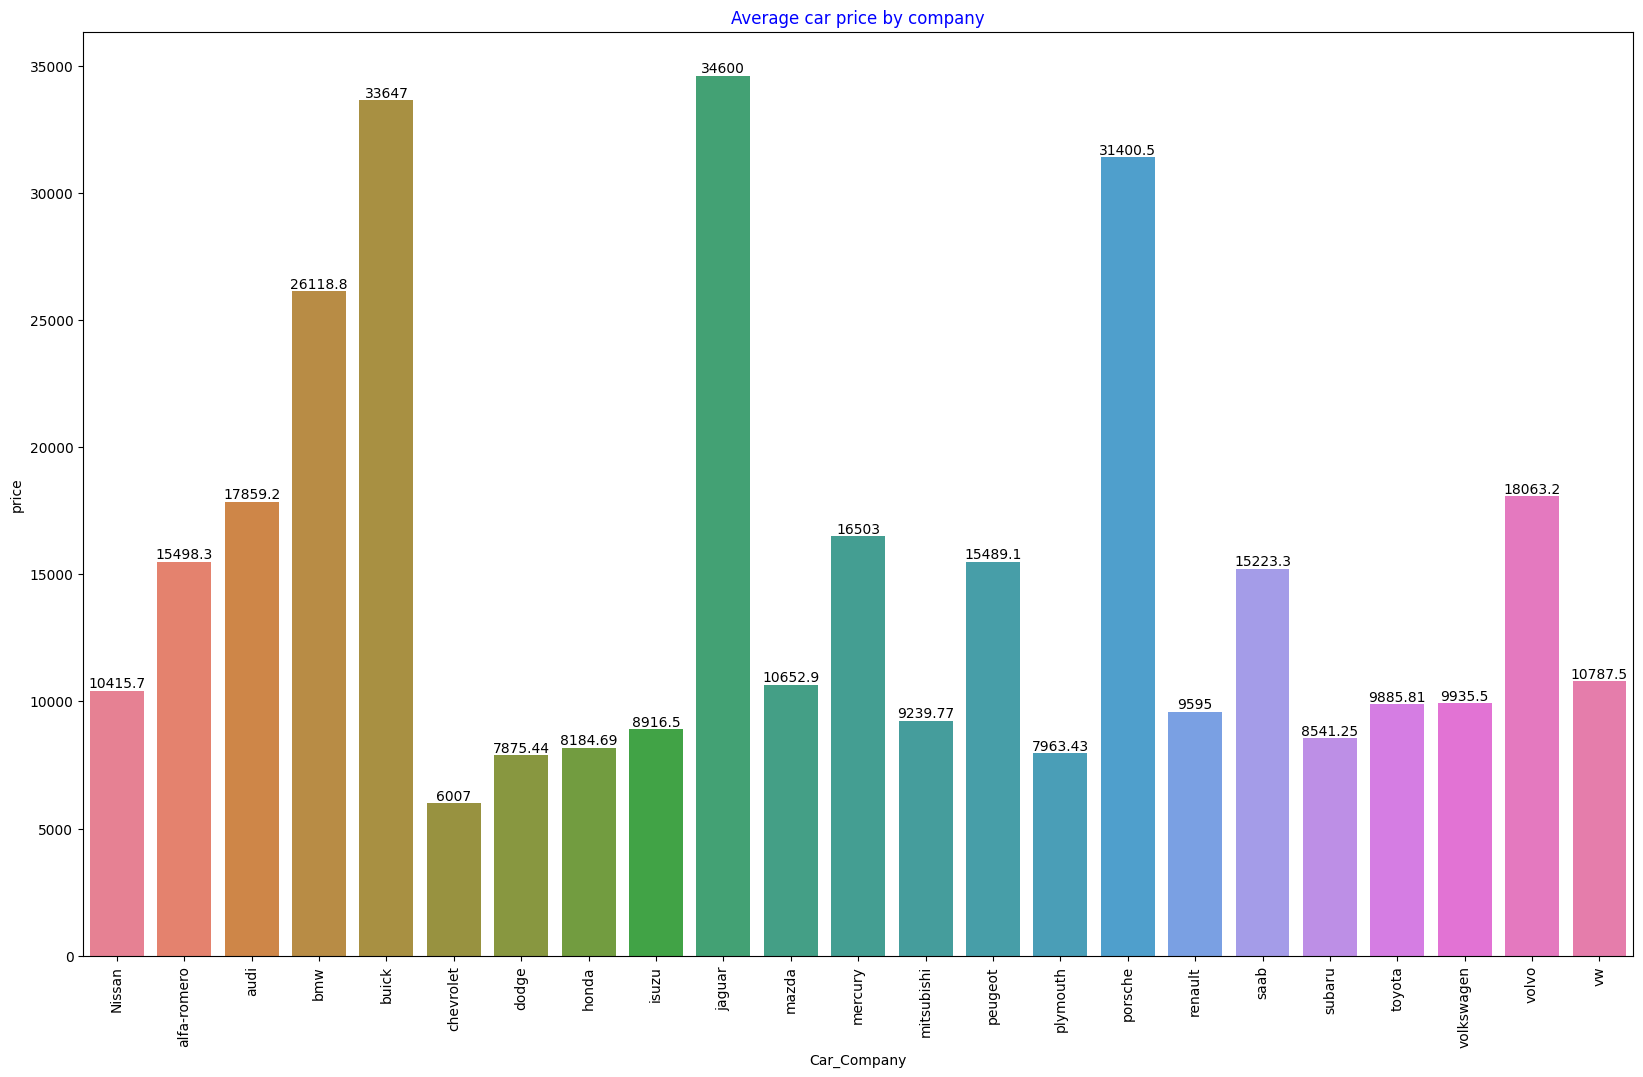

In [45]:
plt.figure(figsize=(20,12))
si=sns.barplot( x= 'Car_Company',y='price',data=average_price_company,hue='Car_Company')
for i in si.containers:
  plt.bar_label(i)
plt.xticks(rotation=90)
plt.title('Average car price by company',color='blue')
plt.show()


In [46]:
engine_location=df["enginelocation"].value_counts()

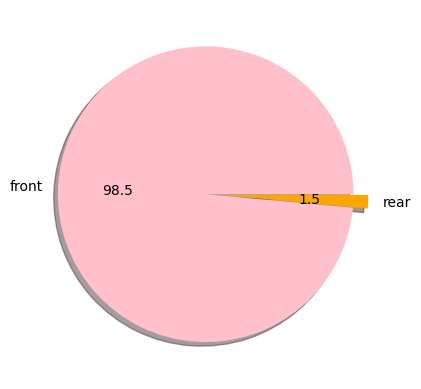

In [47]:
plt.pie(engine_location.values,labels=engine_location.index,autopct="%.1f",shadow=True,explode=[0,0.1],colors=["pink","orange"])
plt.show()

In [48]:
## highest car price:

df["price"].max()

45400.0

In [49]:
df[df["price"]==45400.0]

,Car_Company,Model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,horsepower,peakrpm,citympg,highwaympg,price
74,buick,regal,gas,std,two,hardtop,rwd,front,112.0,199.2,...,3715,ohcv,eight,304,mpfi,184,4500,14,16,45400.0


In [50]:
## lowest car price:

df['price'].min()

5118.0

In [51]:
df[df['price']==5118.0]

,Car_Company,Model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,horsepower,peakrpm,citympg,highwaympg,price
138,subaru,NaN,gas,std,two,hatchback,fwd,front,93.7,156.9,...,2050,ohcf,four,97,2bbl,69,4900,31,36,5118.0


In [52]:
##count of aspiration:

In [53]:
i = df['aspiration'].value_counts()

In [54]:
i

,count
aspiration,
std,168
turbo,37


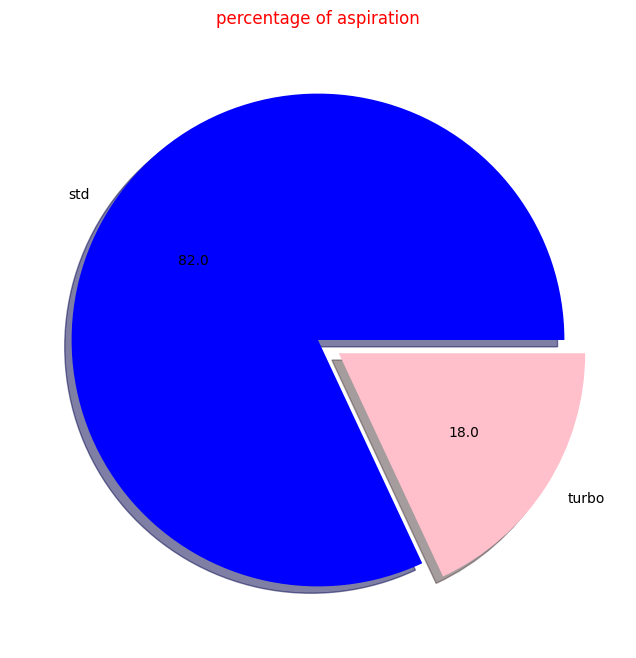

In [55]:
plt.figure(figsize=(12,8))
plt.pie(i.values,labels=i.index,autopct='%.1f',shadow=True,explode=[0,0.1],colors=['blue','pink'])
plt.title('percentage of aspiration',color='red')
plt.show()

In [56]:
df.head(4)

,Car_Company,Model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,2548,dohc,four,130,mpfi,111,5000,21,27,13495.0
1,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,2548,dohc,four,130,mpfi,111,5000,21,27,16500.0
2,alfa-romero,Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2823,ohcv,six,152,mpfi,154,5000,19,26,16500.0
3,audi,100,gas,std,four,sedan,fwd,front,99.8,176.6,...,2337,ohc,four,109,mpfi,102,5500,24,30,13950.0


In [57]:
df['doornumber'].value_counts()

,count
doornumber,
four,115
two,90


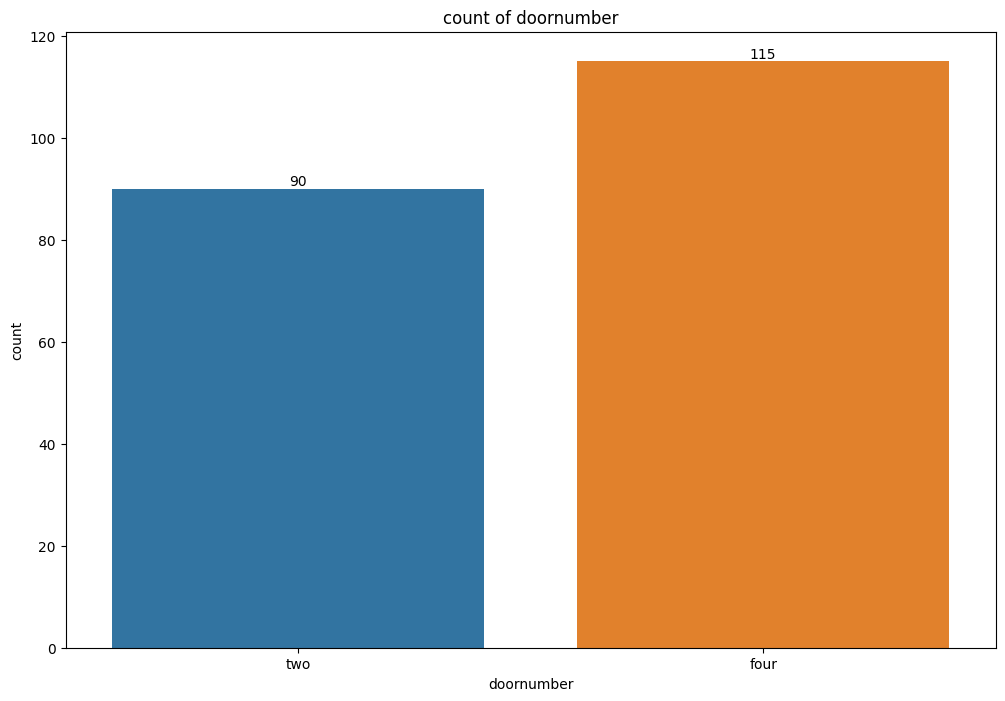

In [58]:
plt.figure(figsize=(12,8))
li= sns.countplot(x='doornumber',data=df,hue='doornumber')
for i in li.containers:
  plt.bar_label(i)
plt.title('count of doornumber')
plt.show()

In [59]:
df['drivewheel'].value_counts()

,count
drivewheel,
fwd,120
rwd,76
4wd,9


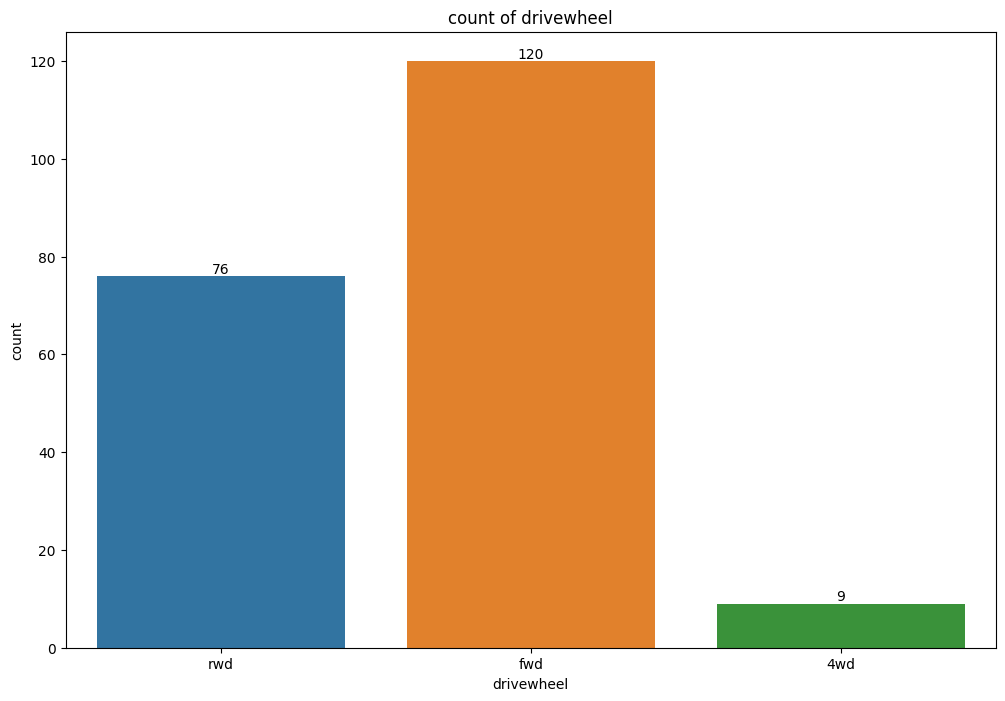

In [60]:
plt.figure(figsize=(12,8))
vi= sns.countplot(x='drivewheel',data=df,hue='drivewheel')
for i in vi.containers:
  plt.bar_label(i)
plt.title('count of drivewheel')
plt.show()

In [61]:
df['wheelbase'].value_counts()

,count
wheelbase,
94.5,21
93.7,20
95.7,13
96.5,8
97.3,7
98.4,7
104.3,6
100.4,6
107.9,6


In [62]:
avg_wheelbase = df.groupby('Car_Company')['wheelbase'].mean().reset_index()
avg_wheelbase

,Car_Company,wheelbase
0,Nissan,95.722222
1,alfa-romero,90.566667
2,audi,102.271429
3,bmw,103.162500
4,buick,110.925000
5,chevrolet,92.466667
6,dodge,95.011111
7,honda,94.330769
8,isuzu,94.825000
9,jaguar,109.333333


<ipython-input-63-140ad844c2ea>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  hi= sns.barplot(x='Car_Company',y='wheelbase',data=avg_wheelbase,palette="crest")


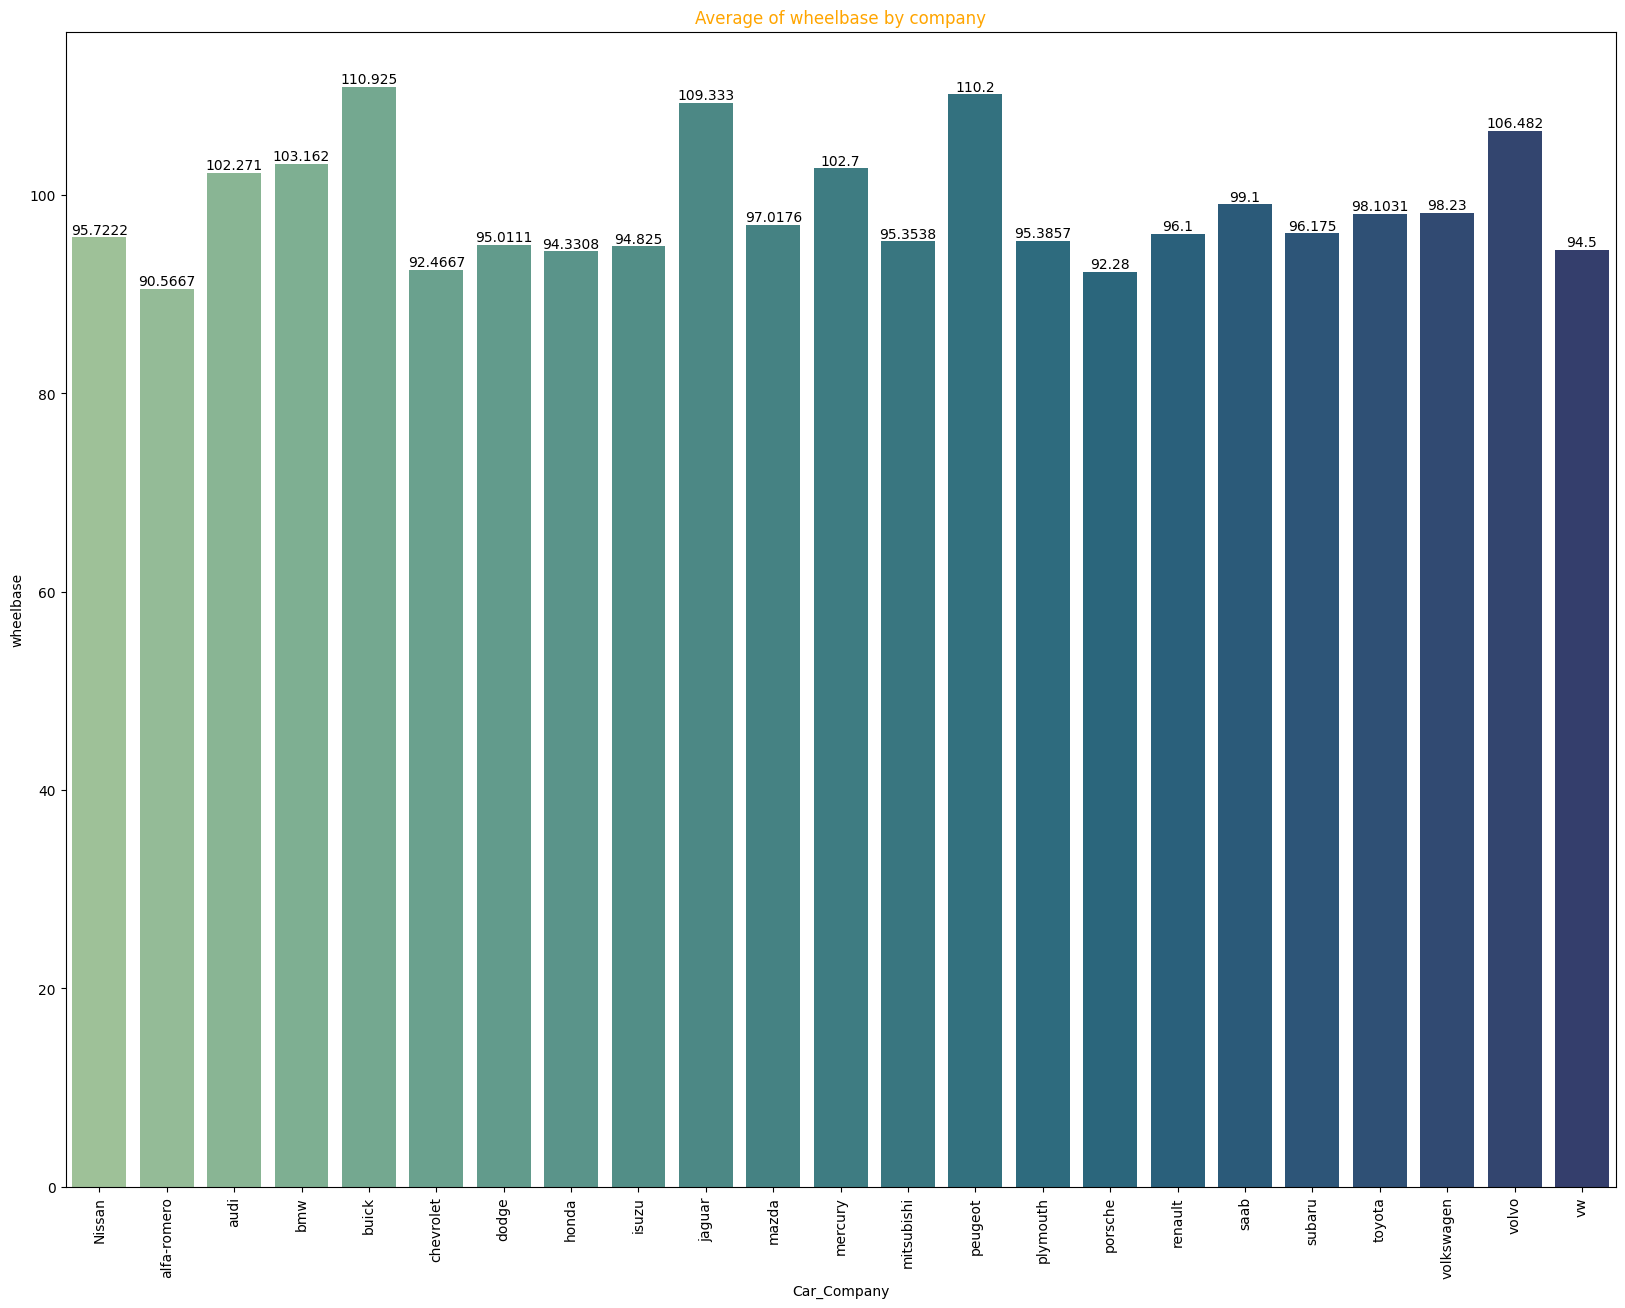

In [63]:
## average wheelbase by car company

plt.figure(figsize=(20,15))
hi= sns.barplot(x='Car_Company',y='wheelbase',data=avg_wheelbase,palette="crest")
for i in hi.containers:
  plt.bar_label(i)
plt.xticks(rotation=90)
plt.title('Average of wheelbase by company',color='orange')
plt.show()

In [64]:
df['curbweight'].value_counts()

,count
curbweight,
2385,4
1918,3
2275,3
1989,3
2410,2
...,...
2370,1
2328,1
2833,1


In [65]:
avg_curbweight = df.groupby('Car_Company')['curbweight'].mean().reset_index()
avg_curbweight

,Car_Company,curbweight
0,Nissan,2400.388889
1,alfa-romero,2639.666667
2,audi,2800.714286
3,bmw,2929.375000
4,buick,3696.250000
5,chevrolet,1757.000000
6,dodge,2151.333333
7,honda,2096.769231
8,isuzu,2213.500000
9,jaguar,4027.333333


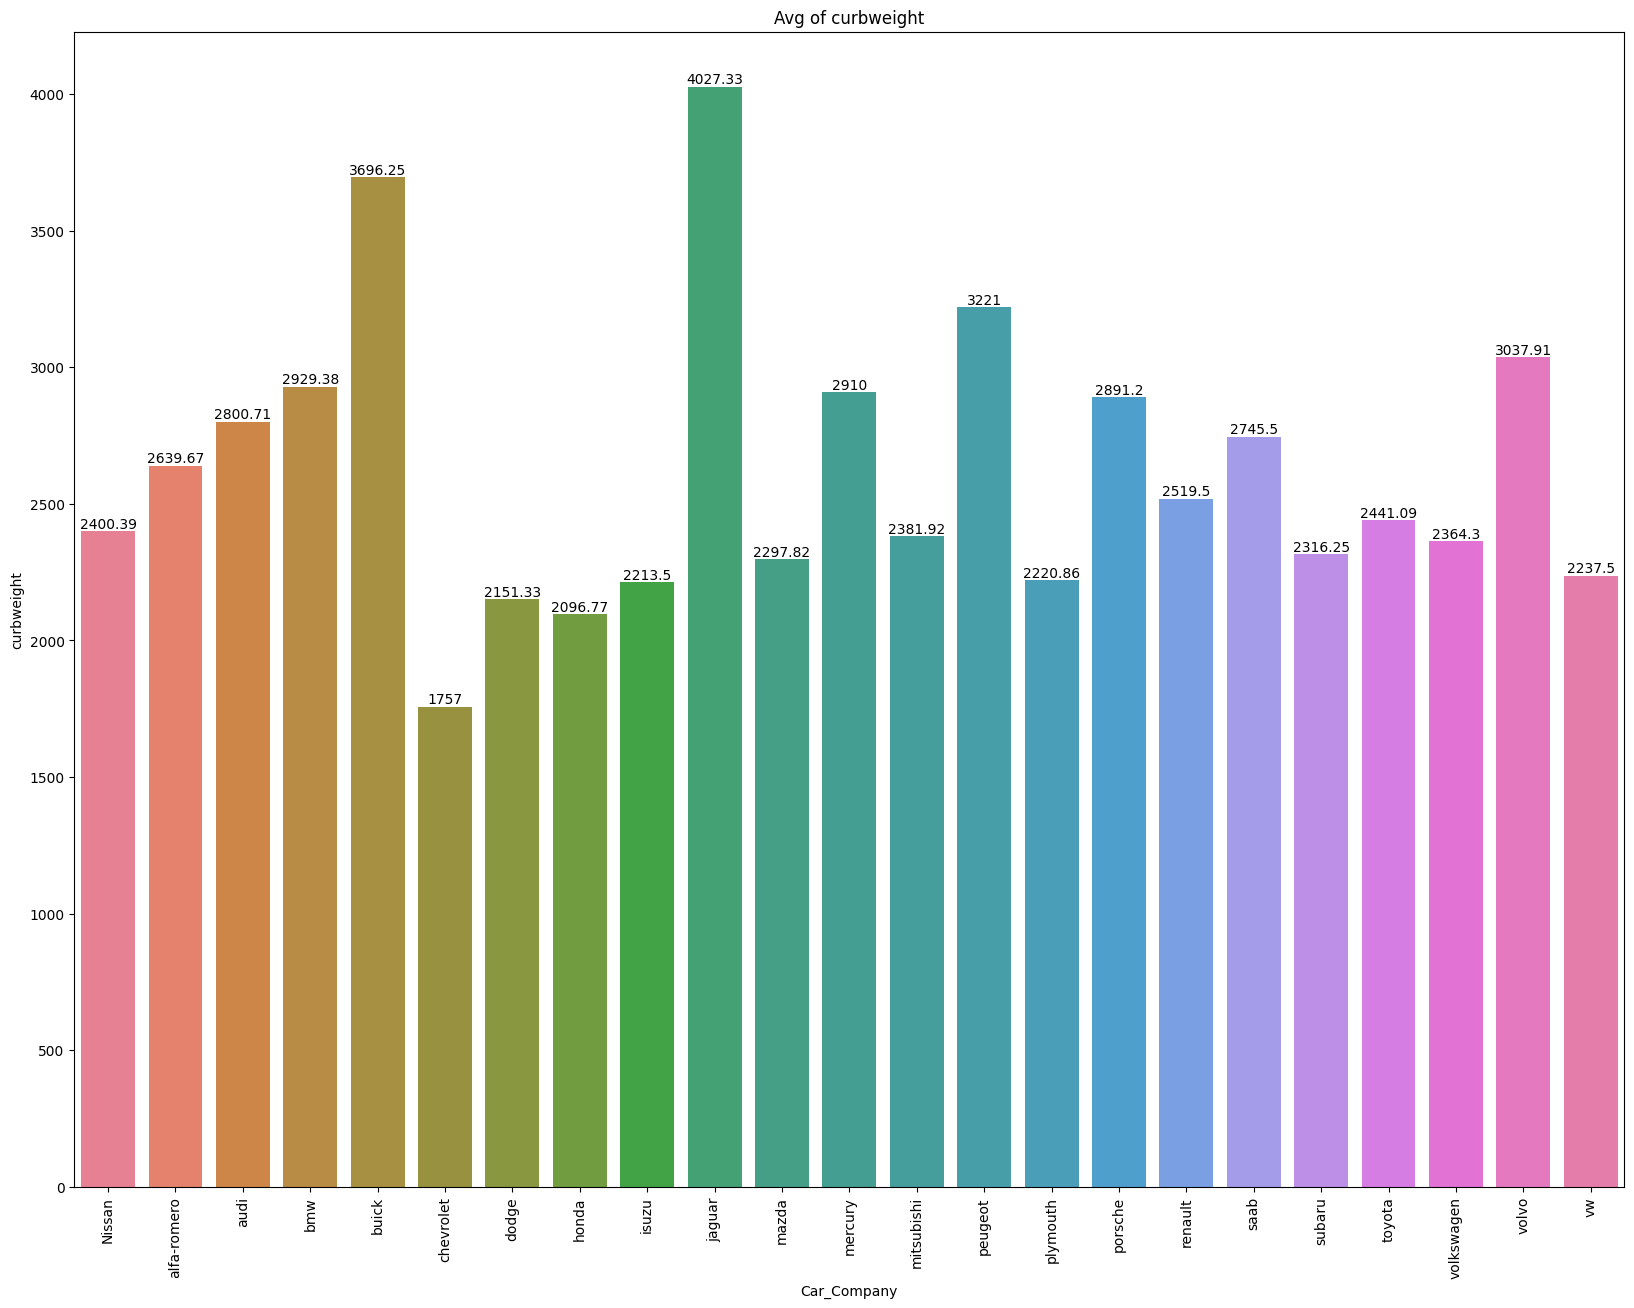

In [66]:
plt.figure(figsize=(20,15))
ri = sns.barplot(x='Car_Company',y='curbweight',data=avg_curbweight,hue='Car_Company')
for i in ri.containers:
  plt.bar_label(i)
plt.xticks(rotation=90)
plt.title('Avg of curbweight')
plt.show()

In [67]:
df['cylindernumber'].value_counts()

,count
cylindernumber,
four,159
six,24
five,11
eight,5
two,4
three,1
twelve,1


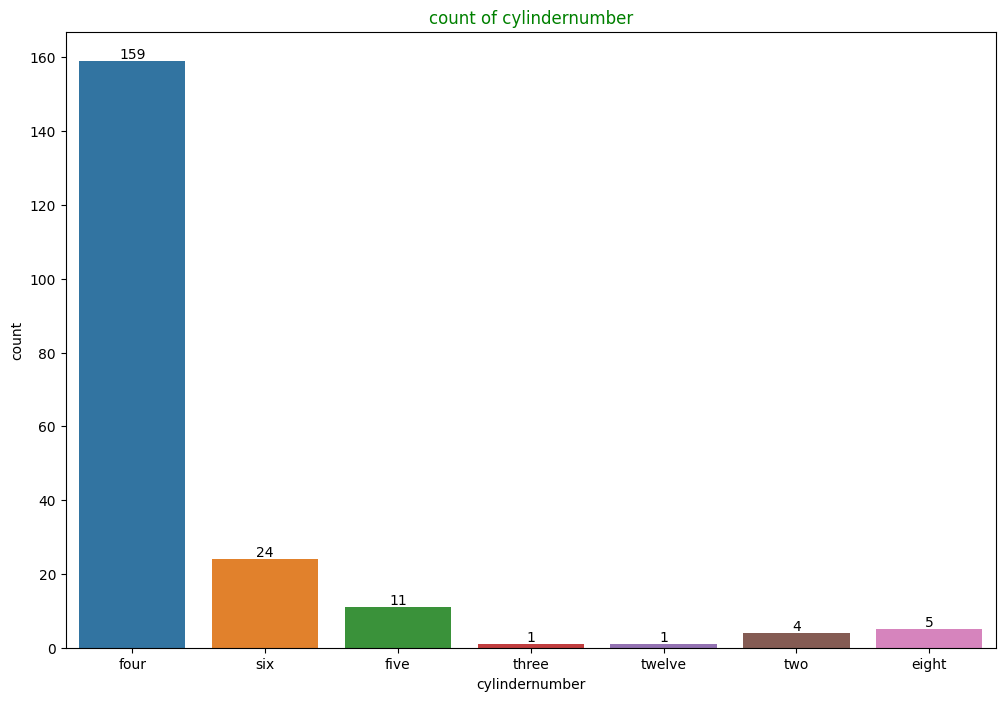

In [68]:
plt.figure(figsize=(12,8))
ri = sns.countplot(x='cylindernumber',data=df,hue='cylindernumber')
for i in ri.containers:
  plt.bar_label(i)
plt.title('count of cylindernumber',color='green')
plt.show()

In [69]:
df['enginesize'].value_counts()

,count
enginesize,
122,15
92,15
97,14
98,14
108,13
90,12
110,12
109,8
120,7


In [70]:
avg_enginesize = df.groupby('Car_Company')['enginesize'].mean().reset_index()

In [71]:
avg_enginesize

,Car_Company,enginesize
0,Nissan,127.888889
1,alfa-romero,137.333333
2,audi,130.714286
3,bmw,166.875000
4,buick,226.500000
5,chevrolet,80.333333
6,dodge,102.666667
7,honda,99.307692
8,isuzu,102.500000
9,jaguar,280.666667


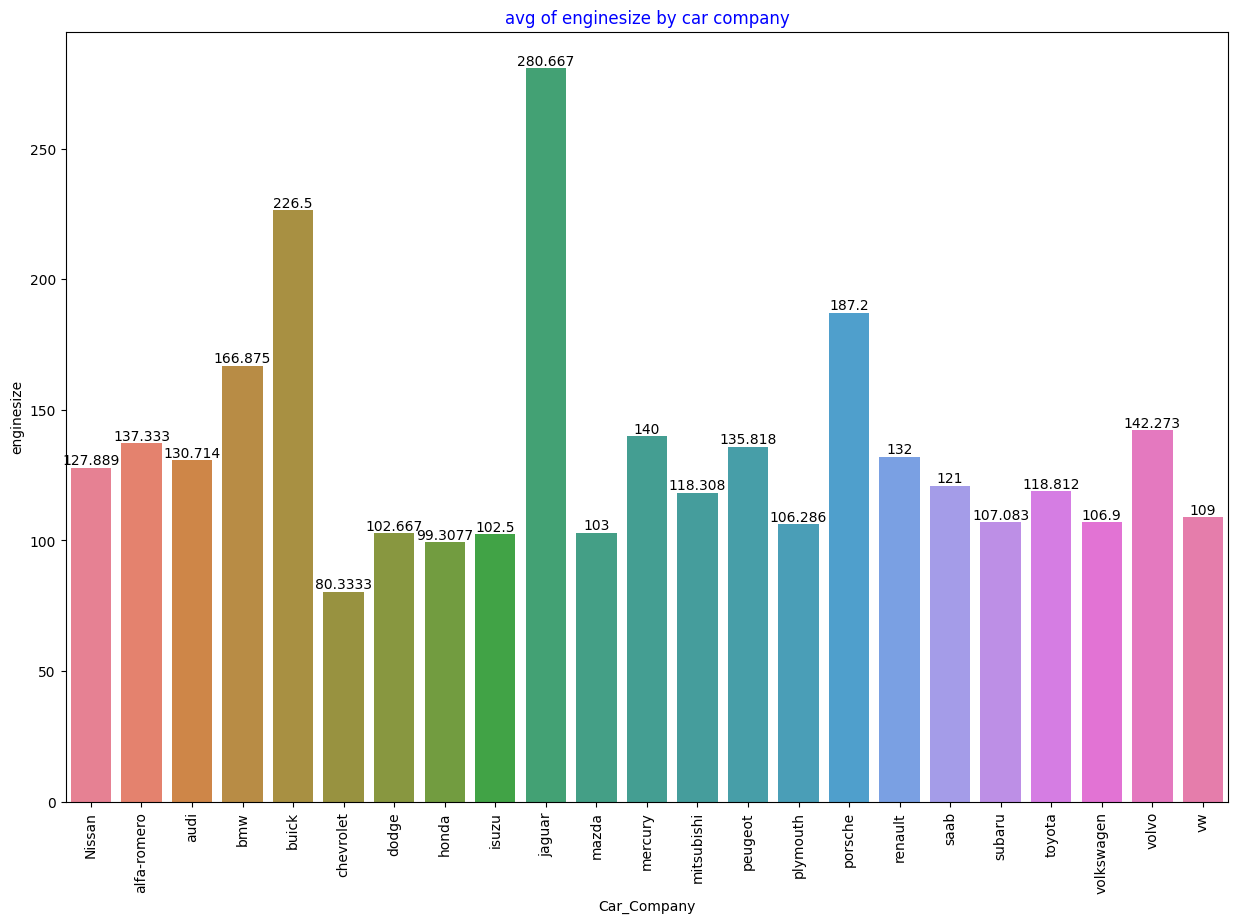

In [72]:
plt.figure(figsize=(15,10))
ui = sns.barplot(x='Car_Company',y='enginesize',data=avg_enginesize,hue='Car_Company')
for i in ui.containers:
  plt.bar_label(i)
plt.xticks(rotation=90)
plt.title('avg of enginesize by car company',color='blue')
plt.show()

In [73]:
df['fuelsystem'].value_counts()

,count
fuelsystem,
mpfi,94
2bbl,66
idi,20
1bbl,11
spdi,9
4bbl,3
mfi,1
spfi,1


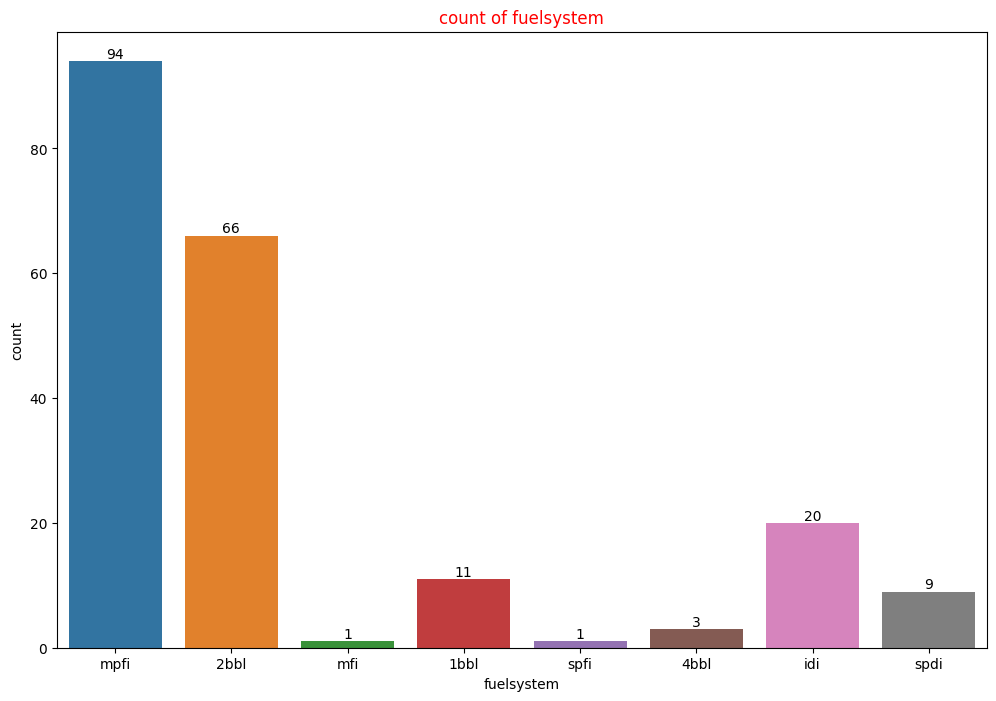

In [74]:
plt.figure(figsize=(12,8))
ei = sns.countplot(x='fuelsystem',data=df,hue='fuelsystem')
for i in ei.containers:
  plt.bar_label(i)
plt.title('count of fuelsystem',color='red')
plt.show()

In [75]:
df['horsepower'].value_counts().head(6)

,count
horsepower,
68,19
70,11
69,10
116,9
110,8
95,7


In [76]:
avg_horsepower = df.groupby('Car_Company')['horsepower'].mean().reset_index()

In [77]:
avg_horsepower['horsepower'] = avg_horsepower['horsepower'].round(2)
avg_horsepower

,Car_Company,horsepower
0,Nissan,102.56
1,alfa-romero,125.33
2,audi,121.00
3,bmw,138.88
4,buick,146.25
5,chevrolet,62.67
6,dodge,86.33
7,honda,80.23
8,isuzu,77.00
9,jaguar,204.67


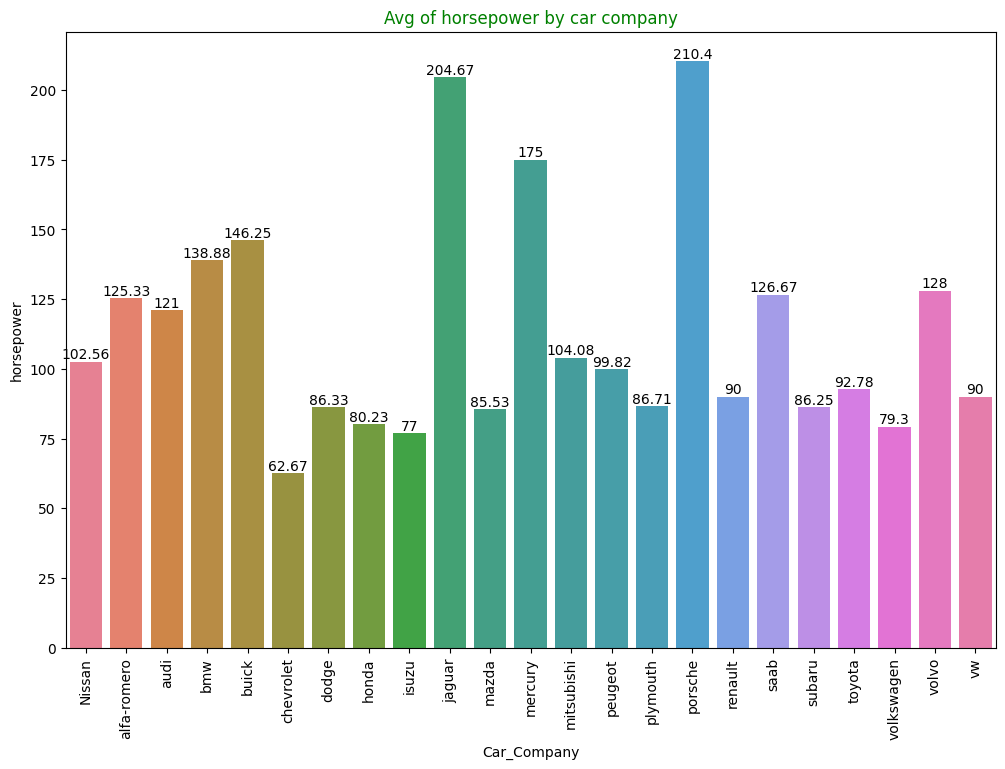

In [78]:
plt.figure(figsize=(12,8))
pi = sns.barplot(x='Car_Company',y='horsepower',data=avg_horsepower,hue='Car_Company')
for i in pi.containers:
  plt.bar_label(i)
plt.xticks(rotation=90)
plt.title('Avg of horsepower by car company',color='green')
plt.show()

In [79]:
df['peakrpm'].value_counts()

,count
peakrpm,
5500,37
4800,36
5000,27
5200,23
5400,13
6000,9
4500,7
5800,7
5250,7


In [80]:
avg_peakrpm = df.groupby('Car_Company')['peakrpm'].mean().reset_index()

In [81]:
avg_peakrpm['peakrpm'] = avg_peakrpm['peakrpm'].round(2)

In [82]:
avg_peakrpm

,Car_Company,peakrpm
0,Nissan,5177.78
1,alfa-romero,5000.00
2,audi,5500.00
3,bmw,5068.75
4,buick,4487.50
5,chevrolet,5300.00
6,dodge,5388.89
7,honda,5753.85
8,isuzu,5150.00
9,jaguar,4833.33


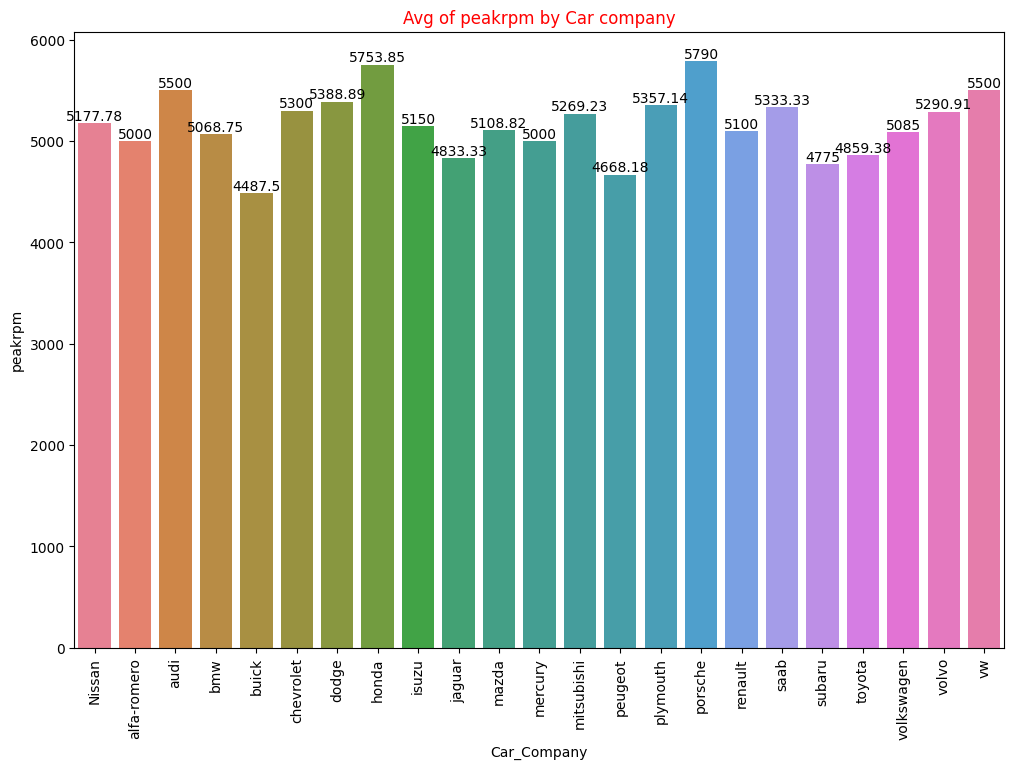

In [83]:
plt.figure(figsize=(12,8))
vi = sns.barplot(x='Car_Company',y='peakrpm',data=avg_peakrpm,hue='Car_Company')
for i in vi.containers:
  plt.bar_label(i)
plt.xticks(rotation=90)
plt.title('Avg of peakrpm by Car company',color = 'red')
plt.show()

In [84]:
df['citympg'].value_counts()

,count
citympg,
31,28
19,27
24,22
27,14
17,13
26,12
23,12
21,8
25,8


In [85]:
avg_citympg = df.groupby('Car_Company')['citympg'].mean().reset_index()

In [86]:
avg_citympg['citympg'] = avg_citympg['citympg'].round(2)

In [87]:
avg_citympg

,Car_Company,citympg
0,Nissan,27.00
1,alfa-romero,20.33
2,audi,18.86
3,bmw,19.38
4,buick,18.50
5,chevrolet,41.00
6,dodge,28.00
7,honda,30.38
8,isuzu,31.00
9,jaguar,14.33


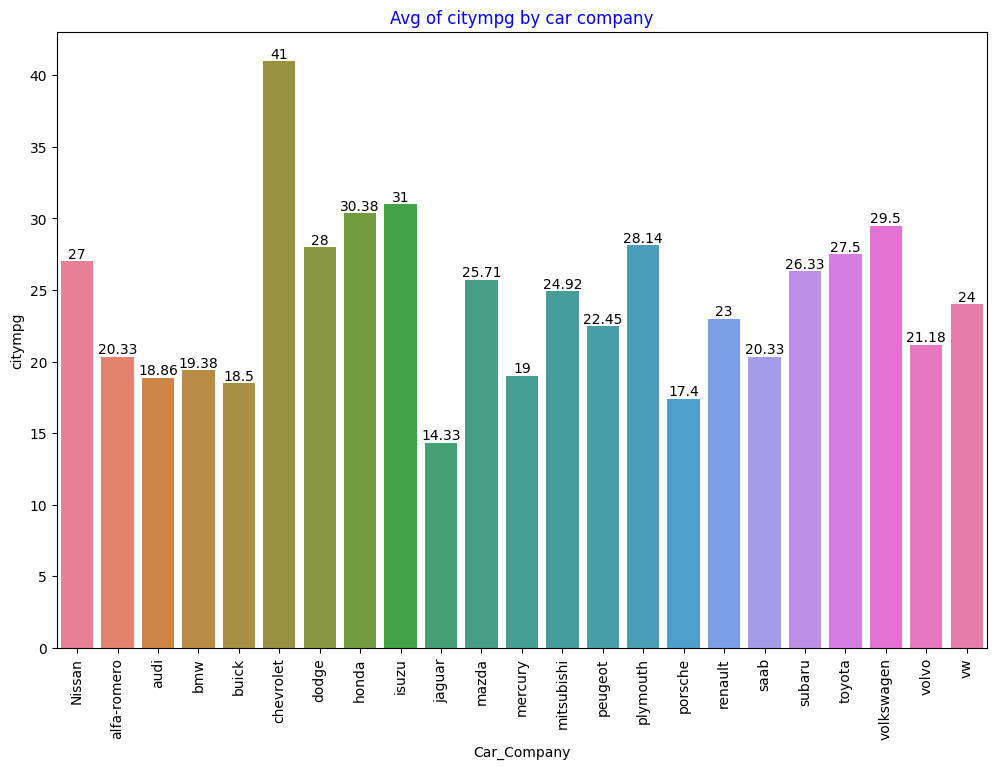

In [88]:
plt.figure(figsize=(12,8))
bi = sns.barplot(x='Car_Company',y= 'citympg',data=avg_citympg,hue='Car_Company')
for i in bi.containers:
  plt.bar_label(i)
plt.xticks(rotation=90)
plt.title('Avg of citympg by car company',color = 'blue')
plt.show()

In [89]:
df['highwaympg'].value_counts()

,count
highwaympg,
25,19
38,17
24,17
30,16
32,16
34,14
37,13
28,13
29,10


In [90]:
avg_highwaympg = df.groupby('Car_Company')['highwaympg'].mean().reset_index()

In [91]:
avg_highwaympg['highwaympg'] = avg_highwaympg['highwaympg'].round(2)

In [92]:
avg_highwaympg

,Car_Company,highwaympg
0,Nissan,32.94
1,alfa-romero,26.67
2,audi,24.14
3,bmw,25.38
4,buick,21.00
5,chevrolet,46.33
6,dodge,34.11
7,honda,35.46
8,isuzu,36.00
9,jaguar,18.33


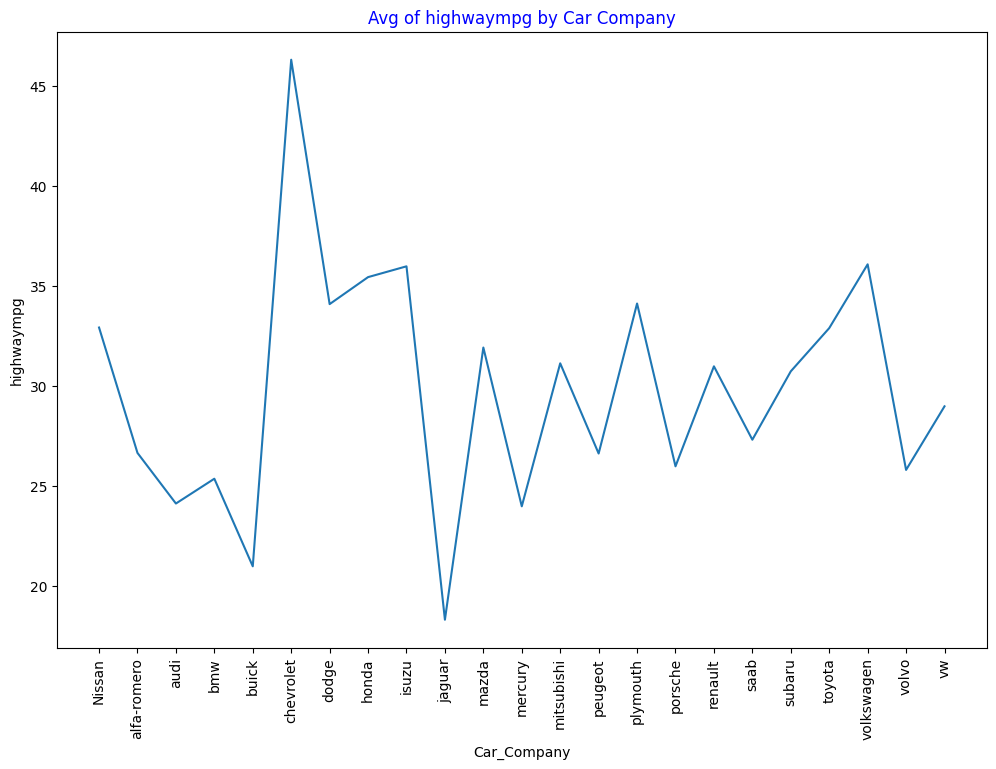

In [93]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Car_Company',y='highwaympg',data= avg_highwaympg)
plt.xticks(rotation=90)
plt.title('Avg of highwaympg by Car Company',color='blue')
plt.show()

In [94]:
top_10_rpm_cars = df.nlargest(10,'peakrpm')

In [95]:
top_10_rpm_cars

,Car_Company,Model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,horsepower,peakrpm,citympg,highwaympg,price
165,toyota,celica,gas,std,two,sedan,rwd,front,94.5,168.7,...,2265,dohc,four,98,mpfi,112,6600,26,29,9298.0
166,toyota,corolla,gas,std,two,hatchback,rwd,front,94.5,168.7,...,2300,dohc,four,98,mpfi,112,6600,26,29,9538.0
31,honda,civic,gas,std,two,hatchback,fwd,front,86.6,144.6,...,1819,ohc,four,92,1bbl,76,6000,31,38,6855.0
33,honda,accord,gas,std,two,hatchback,fwd,front,93.7,150.0,...,1940,ohc,four,92,1bbl,76,6000,30,34,6529.0
34,honda,civic,gas,std,two,hatchback,fwd,front,93.7,150.0,...,1956,ohc,four,92,1bbl,76,6000,30,34,7129.0
35,honda,accord,gas,std,four,sedan,fwd,front,96.5,163.4,...,2010,ohc,four,92,1bbl,76,6000,30,34,7295.0
36,honda,civic,gas,std,four,wagon,fwd,front,96.5,157.1,...,2024,ohc,four,92,1bbl,76,6000,30,34,7295.0
55,mazda,626,gas,std,two,hatchback,rwd,front,95.3,169.0,...,2380,rotor,two,70,4bbl,101,6000,17,23,10945.0
56,mazda,glc,gas,std,two,hatchback,rwd,front,95.3,169.0,...,2380,rotor,two,70,4bbl,101,6000,17,23,11845.0
57,mazda,rx-7,gas,std,two,hatchback,rwd,front,95.3,169.0,...,2385,rotor,two,70,4bbl,101,6000,17,23,13645.0


In [96]:
df['peakrpm'].value_counts().nlargest(10)

,count
peakrpm,
5500,37
4800,36
5000,27
5200,23
5400,13
6000,9
4500,7
5800,7
5250,7


In [97]:
top_10_highest_pricecar = df.nlargest(10,'price')

In [98]:
top_10_highest_pricecar

,Car_Company,Model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,horsepower,peakrpm,citympg,highwaympg,price
74,buick,regal,gas,std,two,hardtop,rwd,front,112.0,199.2,...,3715,ohcv,eight,304,mpfi,184,4500,14,16,45400.0
16,bmw,x5,gas,std,two,sedan,rwd,front,103.5,193.8,...,3380,ohc,six,209,mpfi,182,5400,16,22,41315.0
73,buick,century,gas,std,four,sedan,rwd,front,120.9,208.1,...,3900,ohcv,eight,308,mpfi,184,4500,14,16,40960.0
128,porsche,boxter,gas,std,two,convertible,rwd,rear,89.5,168.9,...,2800,ohcf,six,194,mpfi,207,5900,17,25,37028.0
17,bmw,x3,gas,std,four,sedan,rwd,front,110.0,197.0,...,3505,ohc,six,209,mpfi,182,5400,15,20,36880.0
49,jaguar,xk,gas,std,two,sedan,rwd,front,102.0,191.7,...,3950,ohcv,twelve,326,mpfi,262,5000,13,17,36000.0
48,jaguar,xf,gas,std,four,sedan,rwd,front,113.0,199.6,...,4066,dohc,six,258,mpfi,176,4750,15,19,35550.0
72,buick,skylark,gas,std,two,convertible,rwd,front,96.6,180.3,...,3685,ohcv,eight,234,mpfi,155,4750,16,18,35056.0
71,buick,opel,gas,std,four,sedan,rwd,front,115.6,202.6,...,3740,ohcv,eight,234,mpfi,155,4750,16,18,34184.0
127,porsche,cayenne,gas,std,two,hardtop,rwd,rear,89.5,168.9,...,2756,ohcf,six,194,mpfi,207,5900,17,25,34028.0


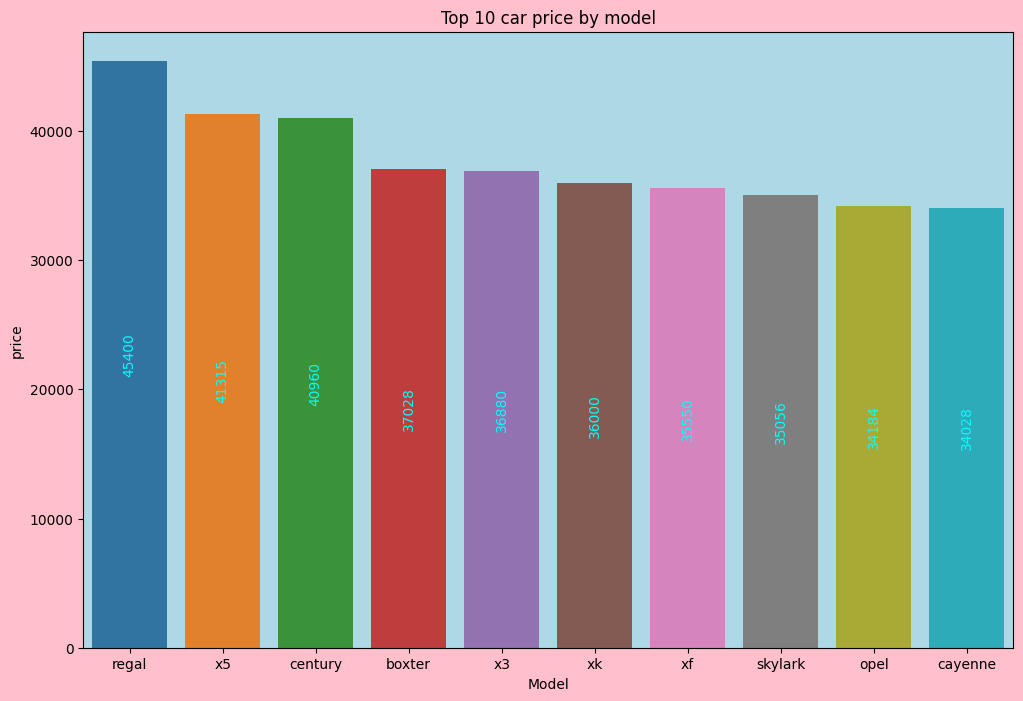

In [99]:
plt.figure(figsize= (12,8))
ci = sns.barplot(x='Model',y='price',data=top_10_highest_pricecar,hue='Model')
for i in ci.containers:
  plt.bar_label(i,rotation=90,label_type='center',color='cyan')
plt.title('Top 10 car price by model')
ci.axes.set_facecolor('lightblue')
plt.gcf().set_facecolor('pink')
plt.show()

In [100]:
top_10_highwaympg = df.nlargest(10,'highwaympg')

In [101]:
top_10_highwaympg

,Car_Company,Model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,horsepower,peakrpm,citympg,highwaympg,price
30,honda,civic,gas,std,two,hatchback,fwd,front,86.6,144.6,...,1713,ohc,four,92,1bbl,58,4800,49,54,6479.0
18,chevrolet,impala,gas,std,two,hatchback,fwd,front,88.4,141.1,...,1488,l,three,61,2bbl,48,5100,47,53,5151.0
90,Nissan,gt-r,diesel,std,two,sedan,fwd,front,94.5,165.3,...,2017,ohc,four,103,idi,55,4800,45,50,7099.0
159,toyota,corolla,diesel,std,four,hatchback,fwd,front,95.7,166.3,...,2275,ohc,four,110,idi,56,4500,38,47,7788.0
160,toyota,corona,gas,std,four,sedan,fwd,front,95.7,166.3,...,2094,ohc,four,98,2bbl,70,4800,38,47,7738.0
182,volkswagen,rabbit,diesel,std,two,sedan,fwd,front,97.3,171.7,...,2261,ohc,four,97,idi,52,4800,37,46,7775.0
184,volkswagen,model,diesel,std,four,sedan,fwd,front,97.3,171.7,...,2264,ohc,four,97,idi,52,4800,37,46,7995.0
19,chevrolet,monte,gas,std,two,hatchback,fwd,front,94.5,155.9,...,1874,ohc,four,90,2bbl,70,5400,38,43,6295.0
20,chevrolet,vega,gas,std,four,sedan,fwd,front,94.5,158.8,...,1909,ohc,four,90,2bbl,70,5400,38,43,6575.0
44,isuzu,D-Max,gas,std,two,sedan,fwd,front,94.5,155.9,...,1874,ohc,four,90,2bbl,70,5400,38,43,8916.5


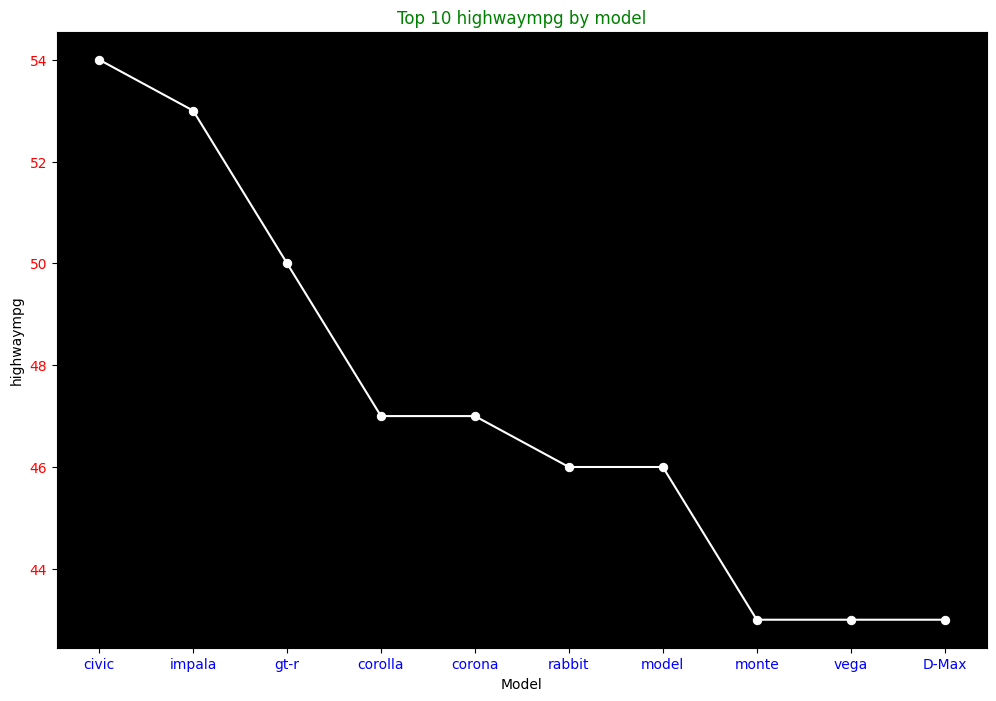

In [102]:
plt.figure(figsize = (12,8))
xi = sns.lineplot(x='Model',y='highwaympg',data=top_10_highwaympg,marker = 'o',color= 'white')
xi.axes.set_facecolor('black')
plt.xticks(color = 'blue')
plt.yticks(color='red')
plt.title('Top 10 highwaympg by model',color = 'green')

plt.show()

In [103]:
top_10_models_citympg = df.sort_values('citympg',ascending = False).head(10)

In [104]:
top_10_models_citympg

,Car_Company,Model,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,horsepower,peakrpm,citympg,highwaympg,price
30,honda,civic,gas,std,two,hatchback,fwd,front,86.6,144.6,...,1713,ohc,four,92,1bbl,58,4800,49,54,6479.0
18,chevrolet,impala,gas,std,two,hatchback,fwd,front,88.4,141.1,...,1488,l,three,61,2bbl,48,5100,47,53,5151.0
90,Nissan,gt-r,diesel,std,two,sedan,fwd,front,94.5,165.3,...,2017,ohc,four,103,idi,55,4800,45,50,7099.0
45,isuzu,D-Max,gas,std,four,sedan,fwd,front,94.5,155.9,...,1909,ohc,four,90,2bbl,70,5400,38,43,8916.5
32,honda,civic,gas,std,two,hatchback,fwd,front,93.7,150.0,...,1837,ohc,four,79,1bbl,60,5500,38,42,5399.0
159,toyota,corolla,diesel,std,four,hatchback,fwd,front,95.7,166.3,...,2275,ohc,four,110,idi,56,4500,38,47,7788.0
160,toyota,corona,gas,std,four,sedan,fwd,front,95.7,166.3,...,2094,ohc,four,98,2bbl,70,4800,38,47,7738.0
44,isuzu,D-Max,gas,std,two,sedan,fwd,front,94.5,155.9,...,1874,ohc,four,90,2bbl,70,5400,38,43,8916.5
20,chevrolet,vega,gas,std,four,sedan,fwd,front,94.5,158.8,...,1909,ohc,four,90,2bbl,70,5400,38,43,6575.0
19,chevrolet,monte,gas,std,two,hatchback,fwd,front,94.5,155.9,...,1874,ohc,four,90,2bbl,70,5400,38,43,6295.0


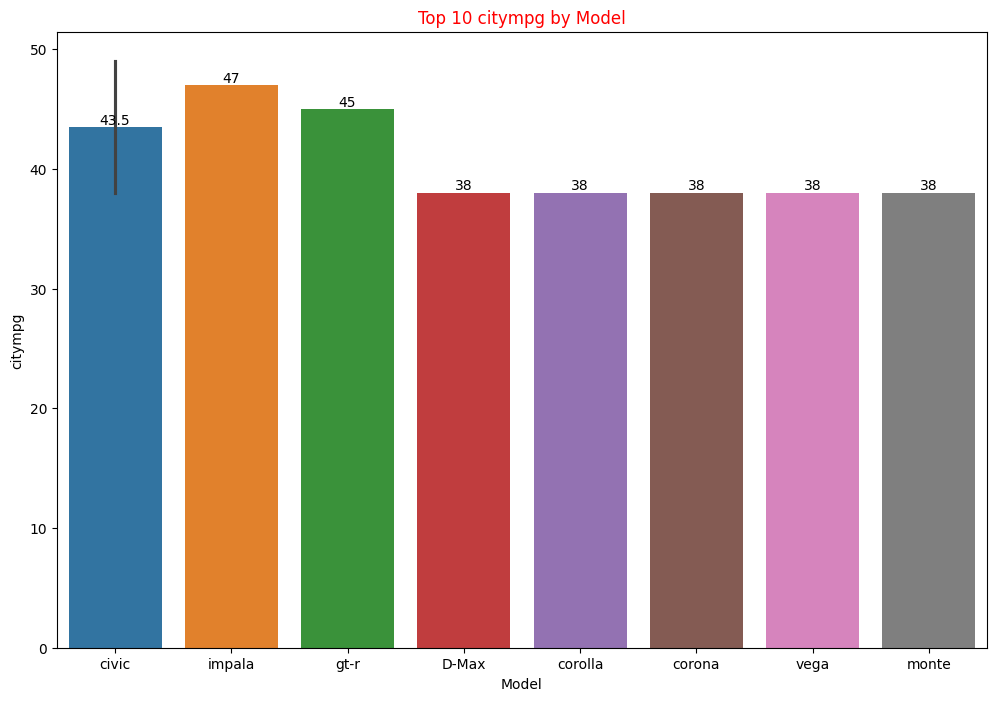

In [110]:
plt.figure(figsize=(12,8))
ni= sns.barplot(x='Model',y='citympg',data=top_10_models_citympg,hue='Model')
for i in ni.containers:
  plt.bar_label(i)
plt.title('Top 10 citympg by Model',color='Red')
plt.show()